# ***Taxi Fare Guru***

# Importing Common Library

In [1]:
import numpy as np
import pandas as pd

# Importing Datasets

In [2]:
df_train = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv")
df_test = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv")
df_sample = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv")

# Data Preprocessing

In [3]:
df_sample.shape # Shape of sample dataset

(1000, 2)

In [4]:
df_sample.head()

,ID,total_amount
0,1,24.456348
1,2,24.374058
2,3,19.878154
3,4,25.015569
4,5,22.252489


In [5]:
df_test.shape # Shape of test dataset

(50000, 16)

In [6]:
df_test.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
0,1,2023-06-29 00:21:20,2023-06-29 00:25:20,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.0
1,1,2023-06-30 17:44:43,2023-06-30 17:53:13,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.0
2,1,2023-06-29 18:17:04,2023-06-29 19:23:48,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.0
3,0,2023-06-30 21:33:53,2023-06-30 21:46:20,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.0
4,1,2023-06-29 14:53:54,2023-06-29 15:22:17,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,0.0,1.0,0.0,0.0


In [7]:
df_train.shape # Shape of training dataset

(175000, 17)

In [8]:
df_train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


## Checking sum of null value

In [9]:
df_test.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          1779
trip_distance               0
RatecodeID               1779
store_and_fwd_flag       1779
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
congestion_surcharge     1779
Airport_fee              1779
dtype: int64

In [10]:
df_train.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

## Checking the types of data

In [11]:
df_test.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type              object
extra                    float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
congestion_surcharge     float64
Airport_fee              float64
dtype: object

In [12]:
df_train.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type              object
extra                    float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
Airport_fee              float64
dtype: object

## Convert Pickup and Dropoff Time to DateTime

* To convert any column to datatime we use pandas
* In pandas we use to_datatime function 

In [13]:
df_train['tpep_pickup_datetime'] = pd.to_datetime(df_train['tpep_pickup_datetime'])

In [14]:
df_train['tpep_dropoff_datetime'] = pd.to_datetime(df_train['tpep_dropoff_datetime'])

In [15]:
df_test['tpep_pickup_datetime'] = pd.to_datetime(df_test['tpep_pickup_datetime'])

In [16]:
df_test['tpep_dropoff_datetime'] = pd.to_datetime(df_test['tpep_dropoff_datetime'])

In [17]:
df_train["tpep_pickup_datetime"].describe

<bound method NDFrame.describe of 0        2023-06-28 17:20:21
1        2023-06-29 23:05:01
2        2023-06-30 10:19:31
3        2023-06-29 13:23:09
4        2023-06-29 22:03:32
                 ...        
174995   2023-06-30 22:50:57
174996   2023-06-30 13:03:33
174997   2023-06-29 11:03:32
174998   2023-06-29 19:47:17
174999   2023-06-30 21:26:43
Name: tpep_pickup_datetime, Length: 175000, dtype: datetime64[ns]>

In [18]:
df_test["tpep_pickup_datetime"].describe

<bound method NDFrame.describe of 0       2023-06-29 00:21:20
1       2023-06-30 17:44:43
2       2023-06-29 18:17:04
3       2023-06-30 21:33:53
4       2023-06-29 14:53:54
                ...        
49995   2023-06-29 17:41:59
49996   2023-06-30 01:25:25
49997   2023-06-30 22:28:44
49998   2023-06-30 02:37:18
49999   2023-06-30 18:05:15
Name: tpep_pickup_datetime, Length: 50000, dtype: datetime64[ns]>

## Time difference

In [19]:
df_train['time_difference'] = df_train['tpep_dropoff_datetime'] - df_train['tpep_pickup_datetime']
df_train['time_difference']

0        -1 days +23:14:24
1        -1 days +22:56:34
2          0 days 00:53:39
3          0 days 00:56:52
4          0 days 00:18:50
                ...       
174995   -1 days +23:31:25
174996     0 days 01:01:24
174997     0 days 01:10:02
174998   -1 days +23:21:38
174999     0 days 01:27:59
Name: time_difference, Length: 175000, dtype: timedelta64[ns]

In [20]:
df_test['time_difference'] = df_test['tpep_dropoff_datetime'] - df_test['tpep_pickup_datetime']
df_test['time_difference']

0         0 days 00:04:00
1         0 days 00:08:30
2         0 days 01:06:44
3         0 days 00:12:27
4         0 days 00:28:23
               ...       
49995     0 days 00:48:37
49996   -1 days +23:45:15
49997   -1 days +23:20:53
49998   -1 days +23:33:15
49999   -1 days +23:10:01
Name: time_difference, Length: 50000, dtype: timedelta64[ns]

## Convert datetime column in string

In [21]:
df_train['time_difference'] = df_train['time_difference'].astype(str)
df_train['time_difference']

0         -1 days +23:14:24
1         -1 days +22:56:34
2           0 days 00:53:39
3           0 days 00:56:52
4           0 days 00:18:50
                ...        
174995    -1 days +23:31:25
174996      0 days 01:01:24
174997      0 days 01:10:02
174998    -1 days +23:21:38
174999      0 days 01:27:59
Name: time_difference, Length: 175000, dtype: object

In [22]:
df_test['time_difference'] = df_test['time_difference'].astype(str)
df_test['time_difference']

0          0 days 00:04:00
1          0 days 00:08:30
2          0 days 01:06:44
3          0 days 00:12:27
4          0 days 00:28:23
               ...        
49995      0 days 00:48:37
49996    -1 days +23:45:15
49997    -1 days +23:20:53
49998    -1 days +23:33:15
49999    -1 days +23:10:01
Name: time_difference, Length: 50000, dtype: object

## Travel time column in minutes

In [23]:
from datetime import datetime, timedelta

# Function to parse the datetime difference strings into timedelta objects
def parse_timedelta(s):
    parts = s.split(' ')
    days = int(parts[0])
    time = parts[2]
    time_parts = time.split(':')
    hours = int(time_parts[0])
    minutes = int(time_parts[1])
    seconds = int(time_parts[2])
    if days < 0:
        return timedelta(days=days, hours=hours, minutes=minutes, seconds=seconds)
    else:
        return timedelta(hours=hours, minutes=minutes, seconds=seconds)

# Apply the parse_timedelta function to the DataFrame train column
df_train['time_difference'] = df_train['time_difference'].apply(parse_timedelta)

# Convert timedelta objects to total minutes (positive values)
df_train['total_time_taken_in_minutes'] = df_train['time_difference'].apply(lambda x: x.total_seconds()/60 if x >= timedelta(0) else -x.total_seconds()/60)

# Apply the parse_timedelta function to the DataFrame test column
df_test['time_difference'] = df_test['time_difference'].apply(parse_timedelta)

# Convert timedelta objects to total minutes (positive values)
df_test['total_time_taken_in_minutes'] = df_test['time_difference'].apply(lambda x: x.total_seconds()/60 if x >= timedelta(0) else -x.total_seconds()/60)

In [24]:
df_train['total_time_taken_in_minutes'] 

0         45.600000
1         63.433333
2         53.650000
3         56.866667
4         18.833333
            ...    
174995    28.583333
174996    61.400000
174997    70.033333
174998    38.366667
174999    87.983333
Name: total_time_taken_in_minutes, Length: 175000, dtype: float64

In [25]:
df_test['total_time_taken_in_minutes'] 

0         4.000000
1         8.500000
2        66.733333
3        12.450000
4        28.383333
           ...    
49995    48.616667
49996    14.750000
49997    39.116667
49998    26.750000
49999    49.983333
Name: total_time_taken_in_minutes, Length: 50000, dtype: float64

In [26]:
df_train

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,time_difference,total_time_taken_in_minutes
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.00,-1 days +23:14:24,45.600000
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.00,-1 days +22:56:34,63.433333
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.00,0 days 00:53:39,53.650000
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.00,0 days 00:56:52,56.866667
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.00,0 days 00:18:50,18.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,1,2023-06-30 22:50:57,2023-06-30 22:22:22,3.0,3.45,1.0,N,147,167,Credit Card,1.0,8.732495,0.0,1.0,28.08,2.5,0.00,-1 days +23:31:25,28.583333
174996,1,2023-06-30 13:03:33,2023-06-30 14:04:57,1.0,9.44,1.0,N,154,191,Cash,5.0,0.283275,0.0,1.0,59.95,2.5,1.75,0 days 01:01:24,61.400000
174997,0,2023-06-29 11:03:32,2023-06-29 12:13:34,1.0,2.40,1.0,N,168,106,Credit Card,2.5,4.245354,0.0,1.0,33.50,2.5,0.00,0 days 01:10:02,70.033333
174998,1,2023-06-29 19:47:17,2023-06-29 19:08:55,1.0,4.71,1.0,N,240,100,Credit Card,2.5,10.479776,0.0,1.0,40.80,2.5,0.00,-1 days +23:21:38,38.366667


In [27]:
df_test

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,time_difference,total_time_taken_in_minutes
0,1,2023-06-29 00:21:20,2023-06-29 00:25:20,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.00,0 days 00:04:00,4.000000
1,1,2023-06-30 17:44:43,2023-06-30 17:53:13,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.00,0 days 00:08:30,8.500000
2,1,2023-06-29 18:17:04,2023-06-29 19:23:48,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.00,0 days 01:06:44,66.733333
3,0,2023-06-30 21:33:53,2023-06-30 21:46:20,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.00,0 days 00:12:27,12.450000
4,1,2023-06-29 14:53:54,2023-06-29 15:22:17,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,0.0,1.0,0.0,0.00,0 days 00:28:23,28.383333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,2023-06-29 17:41:59,2023-06-29 18:30:36,1.0,0.61,1.0,N,48,72,Credit Card,2.5,4.043482,0.0,1.0,2.5,0.00,0 days 00:48:37,48.616667
49996,1,2023-06-30 01:25:25,2023-06-30 01:10:40,1.0,5.02,1.0,N,57,103,Cash,1.0,2.895882,0.0,1.0,0.0,1.75,-1 days +23:45:15,14.750000
49997,1,2023-06-30 22:28:44,2023-06-30 21:49:37,1.0,1.92,1.0,N,150,78,Credit Card,1.0,5.636590,0.0,1.0,2.5,0.00,-1 days +23:20:53,39.116667
49998,0,2023-06-30 02:37:18,2023-06-30 02:10:33,1.0,5.40,1.0,N,4,154,Credit Card,3.5,7.293144,0.0,1.0,2.5,0.00,-1 days +23:33:15,26.750000


## Dropping irrelevant columns

In [28]:
target_column = ['tpep_pickup_datetime','tpep_dropoff_datetime','time_difference']
df_train = df_train.drop(target_column, axis=1)
df_train

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,total_time_taken_in_minutes
0,1,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.00,45.600000
1,0,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.00,63.433333
2,1,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.00,53.650000
3,0,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.00,56.866667
4,1,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.00,18.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174995,1,3.0,3.45,1.0,N,147,167,Credit Card,1.0,8.732495,0.0,1.0,28.08,2.5,0.00,28.583333
174996,1,1.0,9.44,1.0,N,154,191,Cash,5.0,0.283275,0.0,1.0,59.95,2.5,1.75,61.400000
174997,0,1.0,2.40,1.0,N,168,106,Credit Card,2.5,4.245354,0.0,1.0,33.50,2.5,0.00,70.033333
174998,1,1.0,4.71,1.0,N,240,100,Credit Card,2.5,10.479776,0.0,1.0,40.80,2.5,0.00,38.366667


In [29]:
target_column = ['tpep_pickup_datetime','tpep_dropoff_datetime','time_difference']
df_test = df_test.drop(target_column, axis=1)
df_test

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,total_time_taken_in_minutes
0,1,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.00,4.000000
1,1,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.00,8.500000
2,1,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.00,66.733333
3,0,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.00,12.450000
4,1,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,0.0,1.0,0.0,0.00,28.383333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,1.0,0.61,1.0,N,48,72,Credit Card,2.5,4.043482,0.0,1.0,2.5,0.00,48.616667
49996,1,1.0,5.02,1.0,N,57,103,Cash,1.0,2.895882,0.0,1.0,0.0,1.75,14.750000
49997,1,1.0,1.92,1.0,N,150,78,Credit Card,1.0,5.636590,0.0,1.0,2.5,0.00,39.116667
49998,0,1.0,5.40,1.0,N,4,154,Credit Card,3.5,7.293144,0.0,1.0,2.5,0.00,26.750000


In [30]:
df_train.isnull().sum()

VendorID                          0
passenger_count                6077
trip_distance                     0
RatecodeID                     6077
store_and_fwd_flag             6077
PULocationID                      0
DOLocationID                      0
payment_type                      0
extra                             0
tip_amount                        0
tolls_amount                      0
improvement_surcharge             0
total_amount                      0
congestion_surcharge           6077
Airport_fee                    6077
total_time_taken_in_minutes       0
dtype: int64

In [31]:
df_train['store_and_fwd_flag'].unique()

array(['N', nan, 'Y'], dtype=object)

In [32]:
df_train['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    167729
Y      1194
Name: count, dtype: int64

In [33]:
df_test['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    47881
Y      340
Name: count, dtype: int64

## Feature Engineering:-

## Using Label Encoder for store_and_fwd_flag column

In [34]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()
df_train['store_and_fwd_flag'] = label_encoder.fit_transform(df_train['store_and_fwd_flag'])
df_test['store_and_fwd_flag'] = label_encoder.transform(df_test['store_and_fwd_flag'])

In [35]:
df_train.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,total_time_taken_in_minutes
0,1,1.0,2.14,1.0,0,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0,45.600000
1,0,1.0,2.70,1.0,0,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0,63.433333
2,1,1.0,1.15,1.0,0,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0,53.650000
3,0,1.0,0.40,1.0,0,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0,56.866667
4,1,3.0,1.10,1.0,0,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0,18.833333


Values which are represented by label 2 are all which have null values in the column store_and_fwd_flag.

## Checking total null values of the columns

In [36]:
df_train.isnull().sum()

VendorID                          0
passenger_count                6077
trip_distance                     0
RatecodeID                     6077
store_and_fwd_flag                0
PULocationID                      0
DOLocationID                      0
payment_type                      0
extra                             0
tip_amount                        0
tolls_amount                      0
improvement_surcharge             0
total_amount                      0
congestion_surcharge           6077
Airport_fee                    6077
total_time_taken_in_minutes       0
dtype: int64

In [37]:
df_test.isnull().sum()

VendorID                          0
passenger_count                1779
trip_distance                     0
RatecodeID                     1779
store_and_fwd_flag                0
PULocationID                      0
DOLocationID                      0
payment_type                      0
extra                             0
tip_amount                        0
tolls_amount                      0
improvement_surcharge             0
congestion_surcharge           1779
Airport_fee                    1779
total_time_taken_in_minutes       0
dtype: int64

## Checking datatype of the columns

In [38]:
df_train.dtypes

VendorID                         int64
passenger_count                float64
trip_distance                  float64
RatecodeID                     float64
store_and_fwd_flag               int64
PULocationID                     int64
DOLocationID                     int64
payment_type                    object
extra                          float64
tip_amount                     float64
tolls_amount                   float64
improvement_surcharge          float64
total_amount                   float64
congestion_surcharge           float64
Airport_fee                    float64
total_time_taken_in_minutes    float64
dtype: object

## Filling mean or mode value in place of null value

In [39]:
from sklearn.impute import SimpleImputer
# Define the columns that need imputation (excluding datetime columns)
columns_to_impute_1 = ['congestion_surcharge','Airport_fee',]
columns_to_impute_2 = ['passenger_count','RatecodeID']

# Initialize the imputer
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='most_frequent')

# Apply imputation to the specified columns
df_train[columns_to_impute_1] = imputer1.fit_transform(df_train[columns_to_impute_1])
df_test[columns_to_impute_1] = imputer1.transform(df_test[columns_to_impute_1])

df_train[columns_to_impute_2] = imputer2.fit_transform(df_train[columns_to_impute_2])
df_test[columns_to_impute_2] = imputer2.transform(df_test[columns_to_impute_2])

In [40]:
df_train.isnull().sum()

VendorID                       0
passenger_count                0
trip_distance                  0
RatecodeID                     0
store_and_fwd_flag             0
PULocationID                   0
DOLocationID                   0
payment_type                   0
extra                          0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge           0
Airport_fee                    0
total_time_taken_in_minutes    0
dtype: int64

In [41]:
df_train.dtypes

VendorID                         int64
passenger_count                float64
trip_distance                  float64
RatecodeID                     float64
store_and_fwd_flag               int64
PULocationID                     int64
DOLocationID                     int64
payment_type                    object
extra                          float64
tip_amount                     float64
tolls_amount                   float64
improvement_surcharge          float64
total_amount                   float64
congestion_surcharge           float64
Airport_fee                    float64
total_time_taken_in_minutes    float64
dtype: object

In [42]:
df_train['payment_type'].unique()

array(['Credit Card', 'Cash', 'Wallet', 'UPI', 'unknown'], dtype=object)

In [43]:
df_train['payment_type'].value_counts()

payment_type
Credit Card    135257
Cash            30141
Wallet           6077
unknown          2333
UPI              1192
Name: count, dtype: int64

## One Hot Encoder

In [44]:
from sklearn.preprocessing import OneHotEncoder

# Ensure that 'payment_type' is a categorical variable with multiple categories

# Extract the 'payment_type' column from both training and test data
payment_type_train = df_train['payment_type'].values.reshape(-1, 1)
payment_type_test = df_test['payment_type'].values.reshape(-1, 1)

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the encoder on the training 'payment_type' column
payment_type_train_encoded = encoder.fit_transform(payment_type_train).toarray()

# Transform the test 'payment_type' column using the same encoder
payment_type_test_encoded = encoder.transform(payment_type_test).toarray()

# Create DataFrames with the encoded values
payment_type_train_encoded_df = pd.DataFrame(payment_type_train_encoded, columns=encoder.get_feature_names_out(['payment_type']))
payment_type_test_encoded_df = pd.DataFrame(payment_type_test_encoded, columns=encoder.get_feature_names_out(['payment_type']))

# Concatenate the original DataFrames with the encoded DataFrames
df_train = pd.concat([df_train, payment_type_train_encoded_df], axis=1)
df_test = pd.concat([df_test, payment_type_test_encoded_df], axis=1)

# Drop the original 'payment_type' columns if needed
df_train = df_train.drop(['payment_type'], axis=1)
df_test = df_test.drop(['payment_type'], axis=1)


In [45]:
df_train.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,total_time_taken_in_minutes,payment_type_Cash,payment_type_Credit Card,payment_type_UPI,payment_type_Wallet,payment_type_unknown
0,1,1.0,2.14,1.0,0,120,9,2.5,7.165589,0.0,1.0,20.64,2.5,0.0,45.600000,0.0,1.0,0.0,0.0,0.0
1,0,1.0,2.70,1.0,0,15,215,3.5,6.067401,0.0,1.0,25.55,2.5,0.0,63.433333,0.0,1.0,0.0,0.0,0.0
2,1,1.0,1.15,1.0,0,167,223,0.0,4.111547,0.0,1.0,17.64,2.5,0.0,53.650000,0.0,1.0,0.0,0.0,0.0
3,0,1.0,0.40,1.0,0,128,239,2.5,6.411079,0.0,1.0,12.80,2.5,0.0,56.866667,0.0,1.0,0.0,0.0,0.0
4,1,3.0,1.10,1.0,0,203,52,1.0,4.769377,0.0,1.0,18.00,2.5,0.0,18.833333,0.0,1.0,0.0,0.0,0.0


In [46]:
df_test.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,total_time_taken_in_minutes,payment_type_Cash,payment_type_Credit Card,payment_type_UPI,payment_type_Wallet,payment_type_unknown
0,1,1.0,4.95,1.0,0,20,3,1.0,6.067612,0.0,1.0,2.5,0.0,4.000000,0.0,1.0,0.0,0.0,0.0
1,1,1.0,2.10,1.0,0,9,81,2.5,6.191269,0.0,1.0,2.5,0.0,8.500000,0.0,1.0,0.0,0.0,0.0
2,1,1.0,0.95,1.0,0,92,90,2.5,3.983872,0.0,1.0,2.5,0.0,66.733333,1.0,0.0,0.0,0.0,0.0
3,0,1.0,0.80,1.0,0,19,102,3.5,6.839341,0.0,1.0,2.5,0.0,12.450000,0.0,1.0,0.0,0.0,0.0
4,1,1.0,4.01,1.0,0,131,229,0.0,1.468943,0.0,1.0,0.0,0.0,28.383333,1.0,0.0,0.0,0.0,0.0


In [47]:
df_train['store_and_fwd_flag'].unique()

array([0, 2, 1])

# Exploratory Data Analysis (EDA) 

In [48]:
# Below are the libraries that are used in order to perform EDA (Exploratory data analysis).
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation

### Scatter Plot

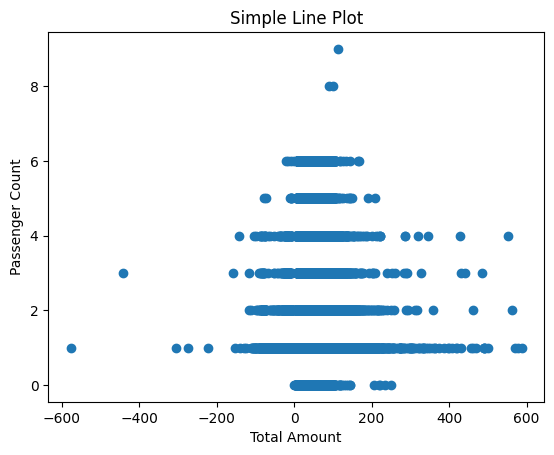

In [49]:
# Create a line plot
plt.scatter(df_train["total_amount"], df_train["passenger_count"])

# Add labels and title
plt.xlabel('Total Amount')
plt.ylabel('Passenger Count')
plt.title('Simple Line Plot')

# Show the plot
plt.show()

### Histrogram

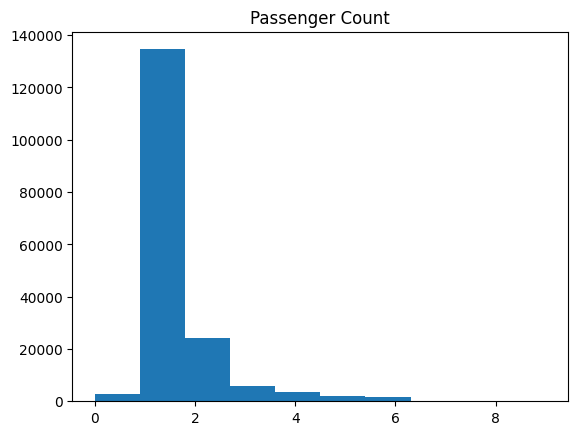

In [50]:
# Create a line plot
plt.hist(df_train["passenger_count"])

# Add title
plt.title('Passenger Count')

# Show the plot
plt.show()

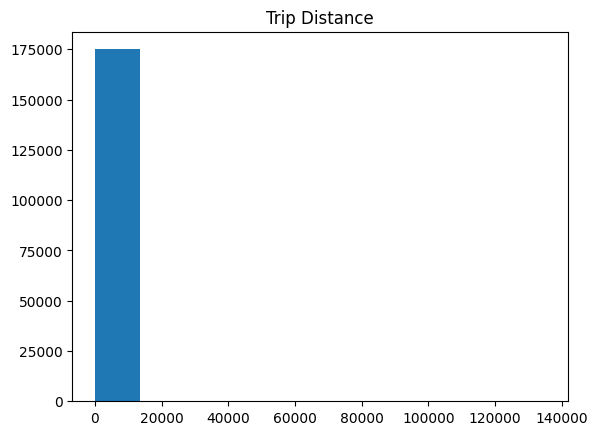

In [51]:
# Create a line plot
plt.hist(df_train["trip_distance"])

# Add title
plt.title('Trip Distance')

# Show the plot
plt.show()

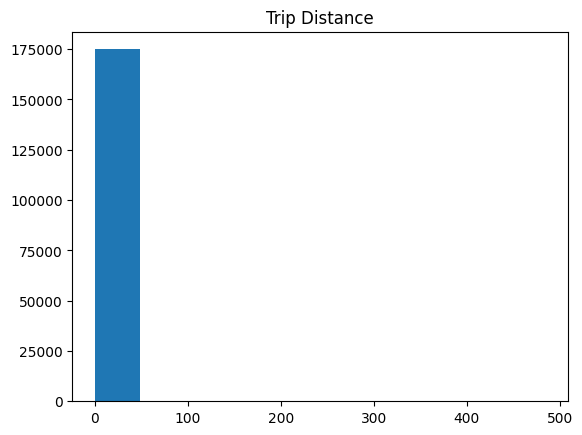

In [52]:
# Create a line plot
plt.hist(df_train["tip_amount"])

# Add title
plt.title('Trip Distance')

# Show the plot
plt.show()

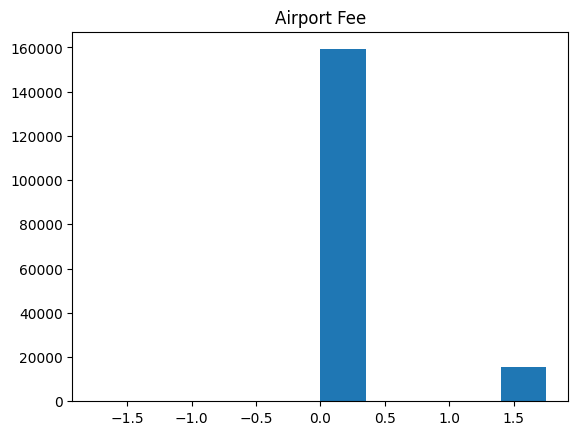

In [53]:
# Create a line plot
plt.hist(df_train["Airport_fee"])

# Add title
plt.title('Airport Fee')

# Show the plot
plt.show()

## Feature Selection:-

## Relation between features

In [54]:
corr_train = df_train.corr(method="pearson", numeric_only=True)
corr_train

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,total_time_taken_in_minutes,payment_type_Cash,payment_type_Credit Card,payment_type_UPI,payment_type_Wallet,payment_type_unknown
VendorID,1.000000,0.095558,0.002857,-0.105150,0.005747,-0.001315,-0.003946,-0.530096,0.043941,0.023642,-0.063197,0.039695,-2.311807e-02,3.589733e-02,0.007247,-0.008457,-0.007900,-0.051798,3.422635e-02,0.039212
passenger_count,0.095558,1.000000,-0.000859,-0.022453,-0.076349,-0.001008,-0.000739,-0.026599,0.015791,0.037293,-0.003627,0.048871,-2.259466e-03,4.067200e-02,0.010894,0.047250,-0.008037,-0.007322,-7.457483e-02,-0.001900
trip_distance,0.002857,-0.000859,1.000000,0.000590,0.019133,-0.000958,-0.002496,-0.001849,0.005847,0.006778,0.000459,0.009911,-3.638501e-03,7.544145e-03,0.003331,-0.001629,-0.006867,-0.000596,1.963892e-02,-0.000476
RatecodeID,-0.105150,-0.022453,0.000590,1.000000,-0.015494,-0.001111,-0.000638,-0.067298,-0.031870,0.060594,0.002404,0.054034,-1.975865e-01,-4.479027e-03,0.021476,-0.029337,0.035150,-0.003488,-1.482427e-02,-0.005653
store_and_fwd_flag,0.005747,-0.076349,0.019133,-0.015494,1.000000,0.002730,0.000688,-0.146801,0.011061,0.049430,0.012537,0.043442,8.763901e-05,-1.029230e-03,0.004529,-0.080555,-0.345523,-0.010758,9.754886e-01,-0.022105
PULocationID,-0.001315,-0.001008,-0.000958,-0.001111,0.002730,1.000000,-0.000161,0.001495,0.000748,-0.000868,-0.000501,0.000715,1.172606e-03,-6.421522e-04,-0.004954,-0.001645,0.000875,-0.002799,2.717544e-03,-0.000111
DOLocationID,-0.003946,-0.000739,-0.002496,-0.000638,0.000688,-0.000161,1.000000,0.002955,-0.000247,-0.002290,-0.002810,-0.002954,6.295487e-04,-4.853102e-03,-0.003552,-0.000891,0.000858,-0.000372,3.758093e-04,-0.000533
extra,-0.530096,-0.026599,-0.001849,-0.067298,-0.146801,0.001495,0.002955,1.000000,0.160331,0.201179,0.170831,0.234346,6.693905e-02,3.317608e-01,0.021034,-0.011930,0.109485,-0.005299,-1.656459e-01,-0.092442
tip_amount,0.043941,0.015791,0.005847,-0.031870,0.011061,0.000748,-0.000247,0.160331,1.000000,0.411588,0.076436,0.638658,-5.840602e-02,3.302989e-01,0.070232,-0.357937,0.353540,-0.064283,1.427204e-02,-0.089749
tolls_amount,0.023642,0.037293,0.006778,0.060594,0.049430,-0.000868,-0.002290,0.201179,0.411588,1.000000,0.051190,0.684765,-1.293717e-01,4.212003e-01,0.088194,-0.009658,-0.002890,-0.013477,5.152035e-02,-0.030225


In [55]:
corr_test = df_test.corr(method="pearson", numeric_only=True)
corr_test

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,total_time_taken_in_minutes,payment_type_Cash,payment_type_Credit Card,payment_type_UPI,payment_type_Wallet,payment_type_unknown
VendorID,1.000000,0.097439,0.005574,-0.111861,0.005753,0.000709,-0.002167,-0.529794,0.039675,0.018194,-0.059925,-0.016662,0.036549,0.012967,-0.003489,-0.013045,-0.043678,0.033716,0.034701
passenger_count,0.097439,1.000000,0.001535,-0.024586,-0.078770,-0.005472,0.002738,-0.028918,0.022905,0.047926,-0.005925,-0.003956,0.039221,0.012471,0.052487,-0.012707,-0.004728,-0.076583,0.000847
trip_distance,0.005574,0.001535,1.000000,0.004132,0.026254,-0.007497,-0.001611,0.004721,0.032305,0.038315,0.000209,-0.016925,0.037548,0.014328,-0.001619,-0.009998,-0.001778,0.026897,-0.000407
RatecodeID,-0.111861,-0.024586,0.004132,1.000000,-0.014845,0.014217,0.000106,-0.070897,-0.038488,0.071767,0.000636,-0.211891,-0.006808,0.019570,-0.030752,0.037038,-0.004212,-0.015555,-0.006119
store_and_fwd_flag,0.005753,-0.078770,0.026254,-0.014845,1.000000,0.007665,-0.001457,-0.147265,0.013758,0.049567,0.012200,-0.003382,0.001971,0.004518,-0.082532,-0.348896,-0.013678,0.976113,-0.022547
PULocationID,0.000709,-0.005472,-0.007497,0.014217,0.007665,1.000000,-0.009733,-0.002706,0.002805,-0.001884,0.001243,-0.009881,0.001978,-0.004706,0.002173,-0.005319,0.002523,0.007944,-0.002295
DOLocationID,-0.002167,0.002738,-0.001611,0.000106,-0.001457,-0.009733,1.000000,0.006109,-0.005741,0.002374,-0.001340,0.006963,-0.005498,-0.001510,-0.000109,-0.000091,-0.003949,-0.000492,0.004207
extra,-0.529794,-0.028918,0.004721,-0.070897,-0.147265,-0.002706,0.006109,1.000000,0.172557,0.201168,0.169193,0.064244,0.328338,0.011674,-0.015299,0.110961,-0.012832,-0.165566,-0.078578
tip_amount,0.039675,0.022905,0.032305,-0.038488,0.013758,0.002805,-0.005741,0.172557,1.000000,0.427782,0.079455,-0.063783,0.342019,0.068039,-0.370589,0.364801,-0.067026,0.016825,-0.094903
tolls_amount,0.018194,0.047926,0.038315,0.071767,0.049567,-0.001884,0.002374,0.201168,0.427782,1.000000,0.055174,-0.134870,0.411804,0.091895,-0.010484,-0.003381,-0.017380,0.049917,-0.021905


## Heat Map

<Axes: >

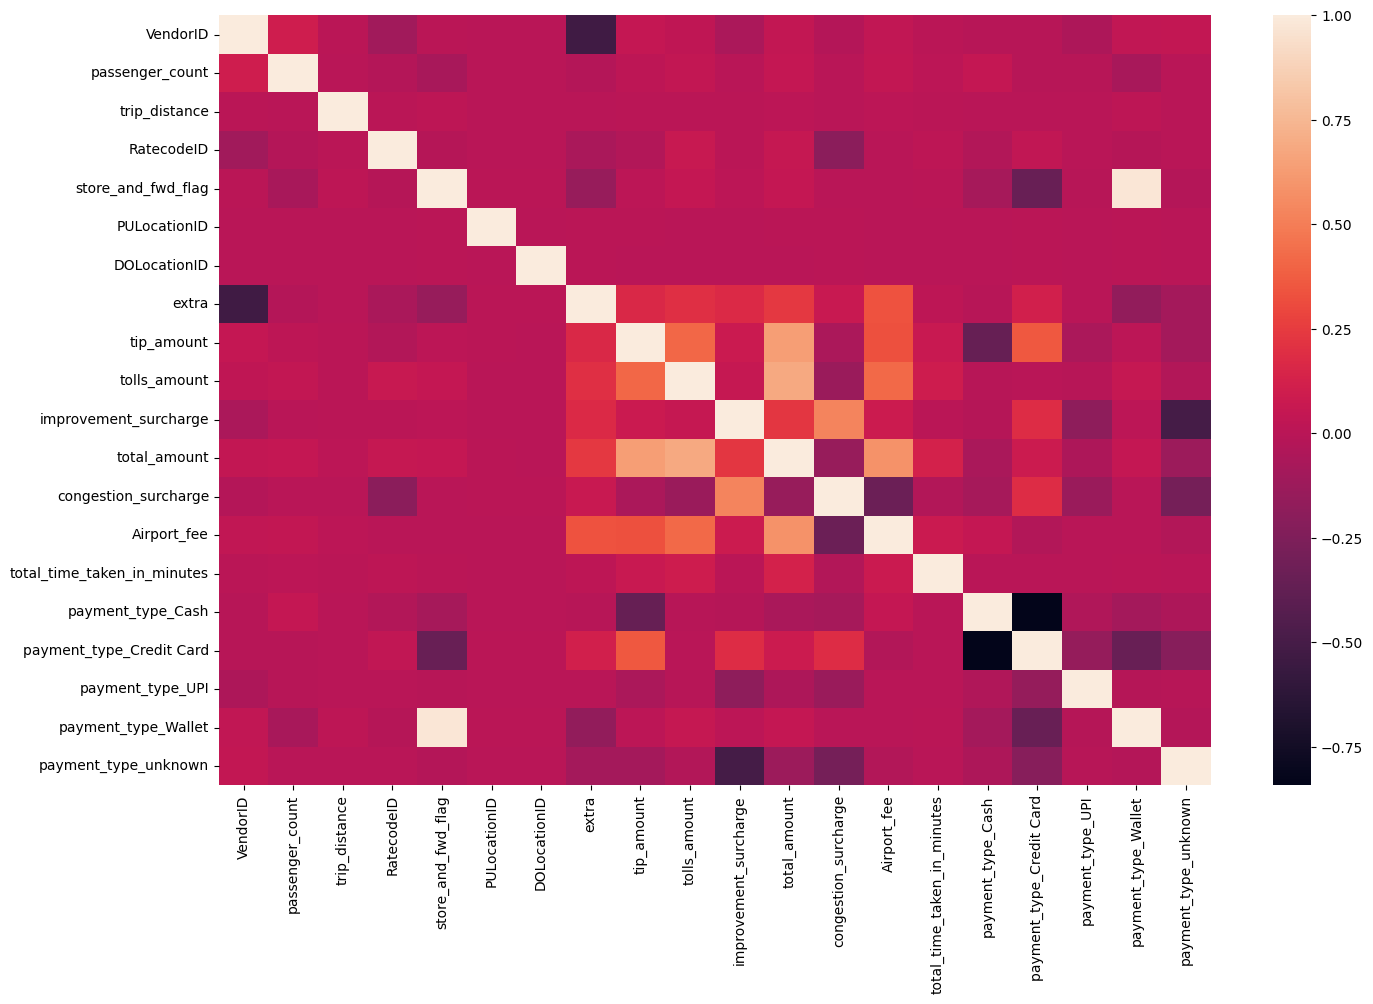

In [56]:
plt.figure(figsize=(16, 10))
sns.heatmap(corr_train, annot=False)
# if we make "annot=True" the with colour correlation value are also comes

<Axes: >

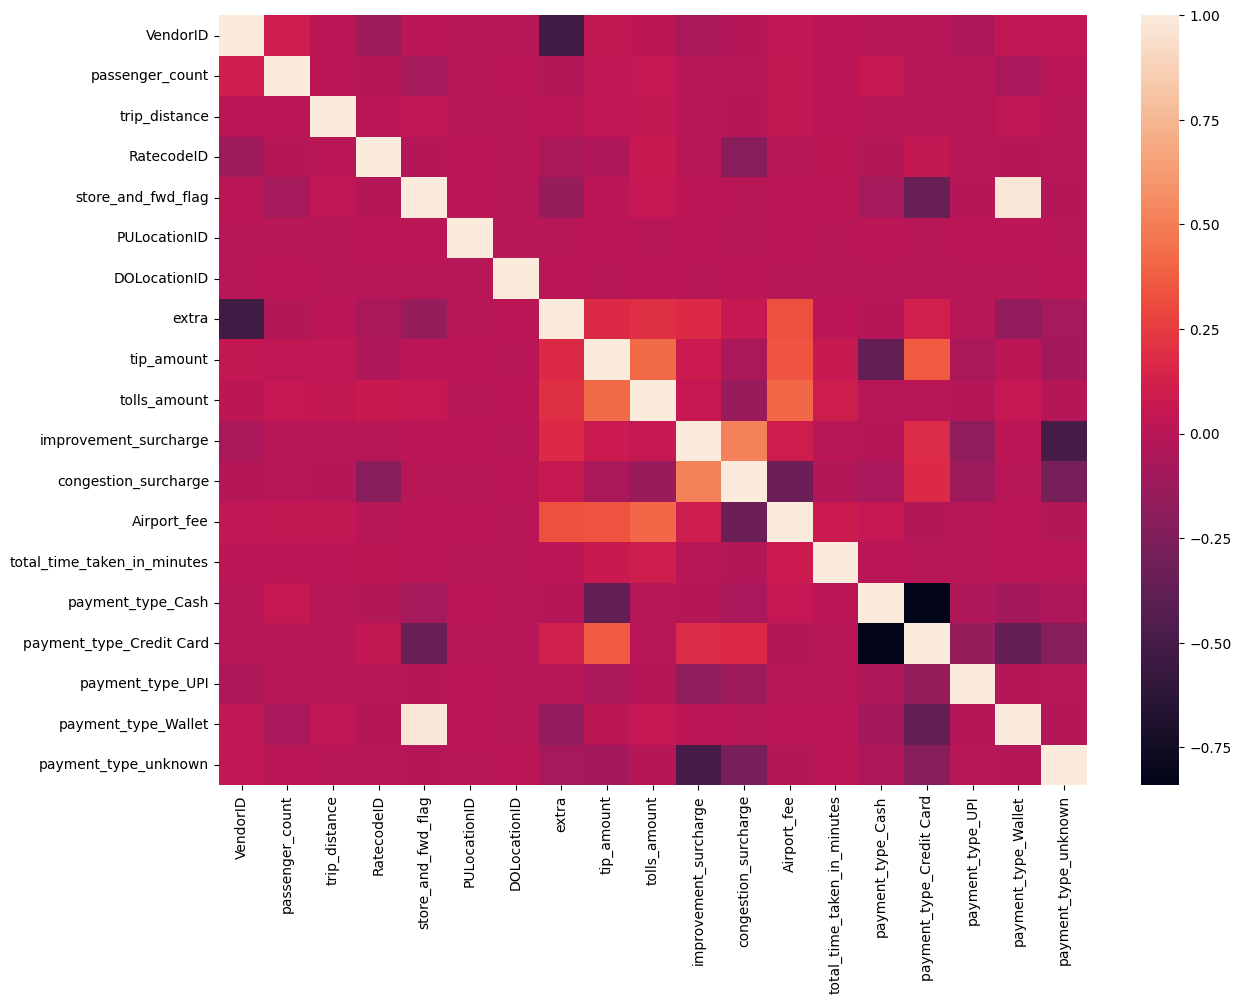

In [57]:
plt.figure(figsize=(14, 10))
sns.heatmap(corr_test, annot=False) 
# if we make "annot=True" the with colour correlation value are also comes

## Removing irrelevant columns

In [58]:
# target_column = ['RatecodeID', 'PULocationID', 'DOLocationID', 'VendorID', 'payment_type_unknown']
# df_train = df_train.drop(target_column, axis=1)
# df_train

In [59]:
# target_column = ['RatecodeID', 'PULocationID', 'DOLocationID', 'VendorID', 'payment_type_unknown']
# df_test = df_test.drop(target_column, axis=1)
# df_test

## Relation between features after removing irrelevant columns

In [60]:
# corr_train = df_train.corr(method="pearson", numeric_only=True)
# corr_train

In [61]:
# corr_test = df_test.corr(method="pearson", numeric_only=True)
# corr_test

## Detecting Outliers

<Axes: xlabel='total_amount'>

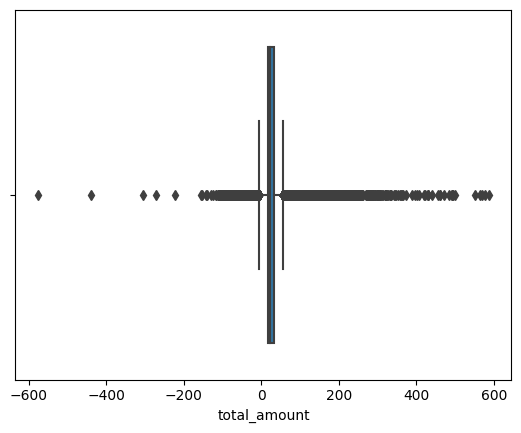

In [62]:
sns.boxplot(x=df_train['total_amount'])

<Axes: xlabel='trip_distance'>

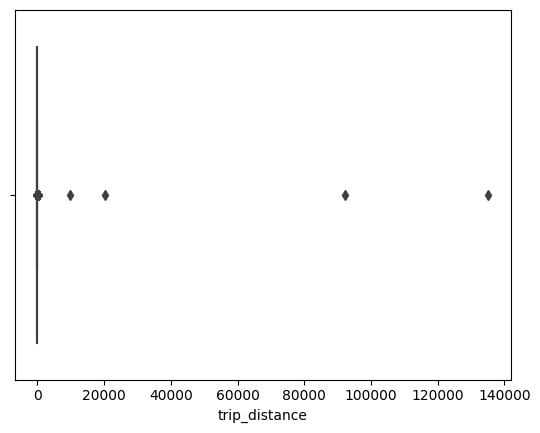

In [63]:
sns.boxplot(x=df_train['trip_distance'])

<Axes: xlabel='tip_amount'>

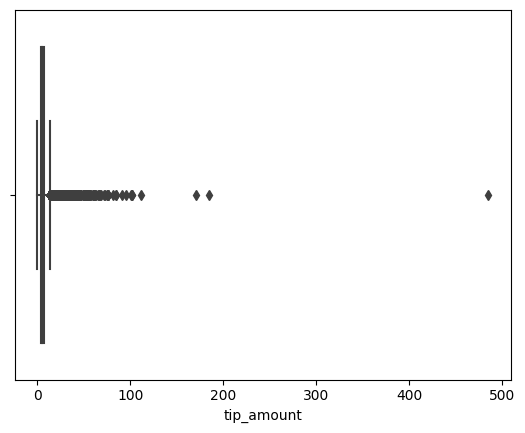

In [64]:
sns.boxplot(x=df_train['tip_amount'])

<Axes: xlabel='tolls_amount'>

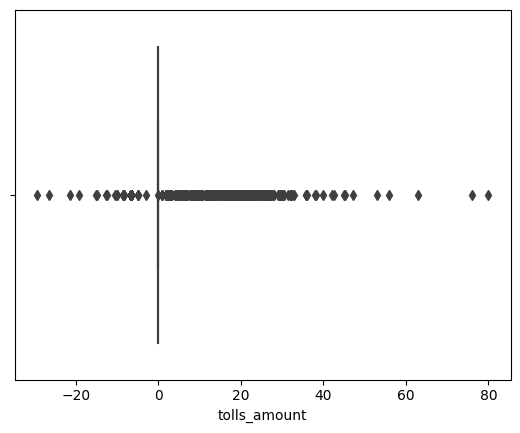

In [65]:
sns.boxplot(x=df_train['tolls_amount'])

<Axes: xlabel='improvement_surcharge'>

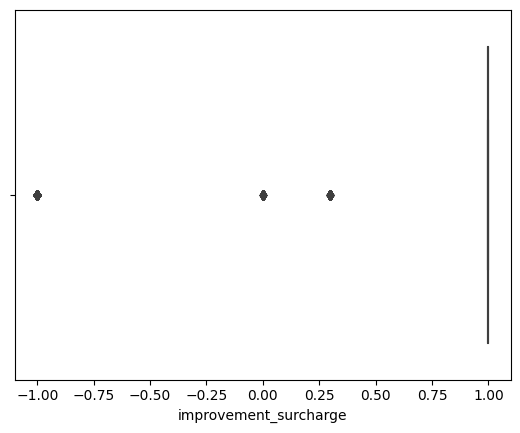

In [66]:
sns.boxplot(x=df_train['improvement_surcharge'])

<Axes: xlabel='congestion_surcharge'>

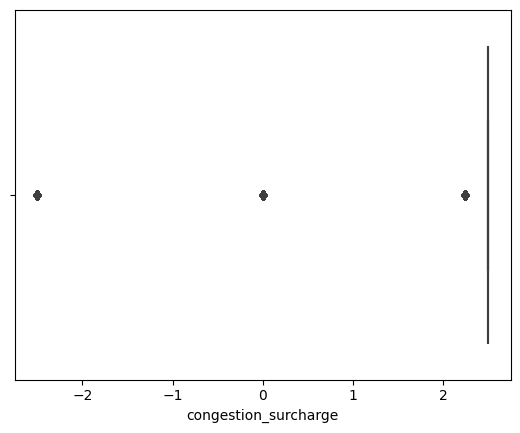

In [67]:
sns.boxplot(x=df_train['congestion_surcharge'])

<Axes: xlabel='Airport_fee'>

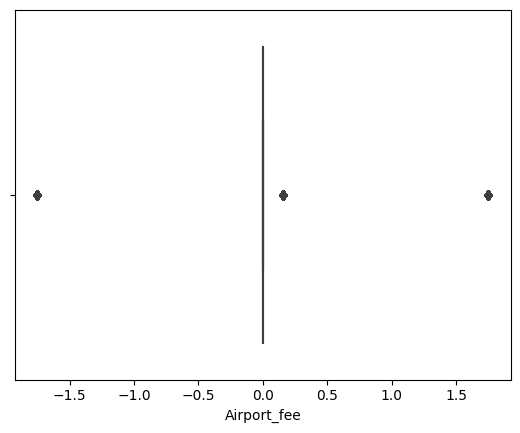

In [68]:
sns.boxplot(x=df_train['Airport_fee'])

## Removing Outliers

In [69]:
# # Calculate the first quartile (Q1) and third quartile (Q3) for the chosen column
# Q1 = df_train['total_amount'].quantile(0.25)
# Q3 = df_train['total_amount'].quantile(0.75)

# # Calculate the interquartile range (IQR)
# IQR = Q3 - Q1

# # Define the lower and upper bounds to identify outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Identify outliers in the chosen column
# outliers = df_train[(df_train['total_amount'] < lower_bound) | (df_train['total_amount'] > upper_bound)]

# # Remove outliers from the chosen column
# cleaned_data = df_train[(df_train['total_amount'] >= lower_bound) & (df_train['total_amount'] <= upper_bound)]

# # Print the number of outliers and the cleaned data
# print(f"Number of outliers in total_amount: {len(outliers)}")
# print(f"Number of remaning to dataset: {len(cleaned_data)}")

In [70]:
# # Calculate the first quartile (Q1) and third quartile (Q3) for the chosen column
# Q1 = df_train['trip_distance'].quantile(0.25)
# Q3 = df_train['trip_distance'].quantile(0.75)

# # Calculate the interquartile range (IQR)
# IQR = Q3 - Q1

# # Define the lower and upper bounds to identify outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Identify outliers in the chosen column
# outliers = df_train[(df_train['trip_distance'] < lower_bound) | (df_train['trip_distance'] > upper_bound)]

# # Remove outliers from the chosen column
# cleaned_data = df_train[(df_train['trip_distance'] >= lower_bound) & (df_train['trip_distance'] <= upper_bound)]

# # Print the number of outliers and the cleaned data
# print(f"Number of outliers in total_amount: {len(outliers)}")
# print(f"Number of remaning to dataset: {len(cleaned_data)}")

In [71]:
# # Calculate the first quartile (Q1) and third quartile (Q3) for the chosen column
# Q1 = df_train['tip_amount'].quantile(0.25)
# Q3 = df_train['tip_amount'].quantile(0.75)

# # Calculate the interquartile range (IQR)
# IQR = Q3 - Q1

# # Define the lower and upper bounds to identify outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Identify outliers in the chosen column
# outliers = df_train[(df_train['tip_amount'] < lower_bound) | (df_train['tip_amount'] > upper_bound)]

# # Remove outliers from the chosen column
# cleaned_data = df_train[(df_train['tip_amount'] >= lower_bound) & (df_train['tip_amount'] <= upper_bound)]

# # Print the number of outliers and the cleaned data
# print(f"Number of outliers in total_amount: {len(outliers)}")
# print(f"Number of remaning to dataset: {len(cleaned_data)}")

In [72]:
# # Calculate the first quartile (Q1) and third quartile (Q3) for the chosen column
# Q1 = df_train['tolls_amount'].quantile(0.25)
# Q3 = df_train['tolls_amount'].quantile(0.75)

# # Calculate the interquartile range (IQR)
# IQR = Q3 - Q1

# # Define the lower and upper bounds to identify outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Identify outliers in the chosen column
# outliers = df_train[(df_train['tolls_amount'] < lower_bound) | (df_train['tolls_amount'] > upper_bound)]

# # Remove outliers from the chosen column
# cleaned_data = df_train[(df_train['tolls_amount'] >= lower_bound) & (df_train['tolls_amount'] <= upper_bound)]

# # Print the number of outliers and the cleaned data
# print(f"Number of outliers in total_amount: {len(outliers)}")
# print(f"Number of remaning to dataset: {len(cleaned_data)}")

In [73]:
# # Calculate the first quartile (Q1) and third quartile (Q3) for the chosen column
# Q1 = df_train['improvement_surcharge'].quantile(0.25)
# Q3 = df_train['improvement_surcharge'].quantile(0.75)

# # Calculate the interquartile range (IQR)
# IQR = Q3 - Q1

# # Define the lower and upper bounds to identify outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Identify outliers in the chosen column
# outliers = df_train[(df_train['improvement_surcharge'] < lower_bound) | (df_train['improvement_surcharge'] > upper_bound)]

# # Remove outliers from the chosen column
# cleaned_data = df_train[(df_train['improvement_surcharge'] >= lower_bound) & (df_train['improvement_surcharge'] <= upper_bound)]

# # Print the number of outliers and the cleaned data
# print(f"Number of outliers in total_amount: {len(outliers)}")
# print(f"Number of remaning to dataset: {len(cleaned_data)}")

In [74]:
# # Calculate the first quartile (Q1) and third quartile (Q3) for the chosen column
# Q1 = df_train['congestion_surcharge'].quantile(0.25)
# Q3 = df_train['congestion_surcharge'].quantile(0.75)

# # Calculate the interquartile range (IQR)
# IQR = Q3 - Q1

# # Define the lower and upper bounds to identify outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Identify outliers in the chosen column
# outliers = df_train[(df_train['congestion_surcharge'] < lower_bound) | (df_train['congestion_surcharge'] > upper_bound)]

# # Remove outliers from the chosen column
# cleaned_data = df_train[(df_train['congestion_surcharge'] >= lower_bound) & (df_train['congestion_surcharge'] <= upper_bound)]

# # Print the number of outliers and the cleaned data
# print(f"Number of outliers in total_amount: {len(outliers)}")
# print(f"Number of remaning to dataset: {len(cleaned_data)}")

In [75]:
# # Calculate the first quartile (Q1) and third quartile (Q3) for the chosen column
# Q1 = df_train['Airport_fee'].quantile(0.25)
# Q3 = df_train['Airport_fee'].quantile(0.75)

# # Calculate the interquartile range (IQR)
# IQR = Q3 - Q1

# # Define the lower and upper bounds to identify outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Identify outliers in the chosen column
# outliers = df_train[(df_train['Airport_fee'] < lower_bound) | (df_train['Airport_fee'] > upper_bound)]

# # Remove outliers from the chosen column
# cleaned_data = df_train[(df_train['Airport_fee'] >= lower_bound) & (df_train['Airport_fee'] <= upper_bound)]

# # Print the number of outliers and the cleaned data
# print(f"Number of outliers in total_amount: {len(outliers)}")
# print(f"Number of remaning to dataset: {len(cleaned_data)}")

## Checking null values

In [76]:
df_train.isnull().sum()

VendorID                       0
passenger_count                0
trip_distance                  0
RatecodeID                     0
store_and_fwd_flag             0
PULocationID                   0
DOLocationID                   0
extra                          0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge           0
Airport_fee                    0
total_time_taken_in_minutes    0
payment_type_Cash              0
payment_type_Credit Card       0
payment_type_UPI               0
payment_type_Wallet            0
payment_type_unknown           0
dtype: int64

In [77]:
df_test.isnull().sum()

VendorID                       0
passenger_count                0
trip_distance                  0
RatecodeID                     0
store_and_fwd_flag             0
PULocationID                   0
DOLocationID                   0
extra                          0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
congestion_surcharge           0
Airport_fee                    0
total_time_taken_in_minutes    0
payment_type_Cash              0
payment_type_Credit Card       0
payment_type_UPI               0
payment_type_Wallet            0
payment_type_unknown           0
dtype: int64

## Checking datatypes of columns

In [78]:
df_train.dtypes

VendorID                         int64
passenger_count                float64
trip_distance                  float64
RatecodeID                     float64
store_and_fwd_flag               int64
PULocationID                     int64
DOLocationID                     int64
extra                          float64
tip_amount                     float64
tolls_amount                   float64
improvement_surcharge          float64
total_amount                   float64
congestion_surcharge           float64
Airport_fee                    float64
total_time_taken_in_minutes    float64
payment_type_Cash              float64
payment_type_Credit Card       float64
payment_type_UPI               float64
payment_type_Wallet            float64
payment_type_unknown           float64
dtype: object

In [79]:
df_test.dtypes

VendorID                         int64
passenger_count                float64
trip_distance                  float64
RatecodeID                     float64
store_and_fwd_flag               int64
PULocationID                     int64
DOLocationID                     int64
extra                          float64
tip_amount                     float64
tolls_amount                   float64
improvement_surcharge          float64
congestion_surcharge           float64
Airport_fee                    float64
total_time_taken_in_minutes    float64
payment_type_Cash              float64
payment_type_Credit Card       float64
payment_type_UPI               float64
payment_type_Wallet            float64
payment_type_unknown           float64
dtype: object

# Feature Scaling

##  Normalization

Normalization, in the context of data and statistics, refers to the process of scaling and standardizing the values of features (variables) in a dataset. The goal is to bring the values of different features to a similar scale or range, making it easier to compare and analyze them. 

### MinMaxScaler 
* If data is not normally distributed 
* In MinMaxScaler data lie between 0 to 1

In [80]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
min_max_scaler = MinMaxScaler()

# Define the columns to be scaled
columns_to_scale = ['passenger_count', 'trip_distance','extra', 'tip_amount', 'tolls_amount', 'improvement_surcharge','congestion_surcharge', 'Airport_fee']

# Apply Min-Max scaling to the selected columns
df_train[columns_to_scale] = min_max_scaler.fit_transform(df_train[columns_to_scale])
df_test[columns_to_scale] = min_max_scaler.transform(df_test[columns_to_scale])


##  Standardization

Standardization, also known as z-score normalization or zero-mean normalization, is a data preprocessing technique used in statistics and machine learning. The goal of standardization is to transform the data in a way that allows for meaningful comparisons and analyses, especially when dealing with features that have different units or scales.

### StandardScaler 
* If data is normally distributed 
* Mean = 0
* Standard Deviation = 1

In [81]:
from sklearn.preprocessing import StandardScaler

# Define the columns you want to standardize
columns_to_scale = ['passenger_count', 'trip_distance']

# Initialize the scaler
standard_scaler = StandardScaler()

# Apply standardization to the selected columns
df_train[columns_to_scale] = standard_scaler.fit_transform(df_train[columns_to_scale])
df_test[columns_to_scale] = standard_scaler.transform(df_test[columns_to_scale])

### Information about Columns

In [82]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   VendorID                     50000 non-null  int64  
 1   passenger_count              50000 non-null  float64
 2   trip_distance                50000 non-null  float64
 3   RatecodeID                   50000 non-null  float64
 4   store_and_fwd_flag           50000 non-null  int64  
 5   PULocationID                 50000 non-null  int64  
 6   DOLocationID                 50000 non-null  int64  
 7   extra                        50000 non-null  float64
 8   tip_amount                   50000 non-null  float64
 9   tolls_amount                 50000 non-null  float64
 10  improvement_surcharge        50000 non-null  float64
 11  congestion_surcharge         50000 non-null  float64
 12  Airport_fee                  50000 non-null  float64
 13  total_time_taken

In [83]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   VendorID                     175000 non-null  int64  
 1   passenger_count              175000 non-null  float64
 2   trip_distance                175000 non-null  float64
 3   RatecodeID                   175000 non-null  float64
 4   store_and_fwd_flag           175000 non-null  int64  
 5   PULocationID                 175000 non-null  int64  
 6   DOLocationID                 175000 non-null  int64  
 7   extra                        175000 non-null  float64
 8   tip_amount                   175000 non-null  float64
 9   tolls_amount                 175000 non-null  float64
 10  improvement_surcharge        175000 non-null  float64
 11  total_amount                 175000 non-null  float64
 12  congestion_surcharge         175000 non-null  float64
 13 

### Description about Columns

In [84]:
df_train.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,total_time_taken_in_minutes,payment_type_Cash,payment_type_Credit Card,payment_type_UPI,payment_type_Wallet,payment_type_unknown
count,175000.000000,1.750000e+05,1.750000e+05,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000
mean,0.728377,-5.548222e-16,-2.385393e-18,1.500309,0.076274,132.710349,132.701429,0.489981,0.012637,0.273987,0.989844,29.633901,0.949394,0.545379,44.191582,0.172234,0.772897,0.006811,0.034726,0.013331
std,0.445606,1.000003e+00,1.000003e+00,6.401268,0.374044,76.148799,76.192493,0.101221,0.009509,0.021302,0.099387,25.425206,0.160973,0.143714,40.849813,0.377585,0.418961,0.082250,0.183085,0.114690
min,0.000000,-1.531986e+00,-1.302866e-02,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-576.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-3.931806e-01,-1.029428e-02,1.000000,0.000000,67.000000,67.000000,0.389610,0.007163,0.268070,1.000000,16.300000,1.000000,0.500000,17.783333,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,-3.931806e-01,-8.370081e-03,1.000000,0.000000,133.000000,133.000000,0.441558,0.010902,0.268070,1.000000,21.450000,1.000000,0.500000,37.933333,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,-3.931806e-01,-3.888727e-03,1.000000,0.000000,199.000000,199.000000,0.519481,0.015473,0.268070,1.000000,31.800000,1.000000,0.500000,64.220833,0.000000,1.000000,0.000000,0.000000,0.000000
max,2.000000,8.717260e+00,3.422461e+02,99.000000,2.000000,264.000000,264.000000,1.000000,1.000000,1.000000,1.000000,587.250000,1.000000,1.000000,1436.950000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
df_test.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,total_time_taken_in_minutes,payment_type_Cash,payment_type_Credit Card,payment_type_UPI,payment_type_Wallet,payment_type_unknown
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,0.730280,0.000345,-0.002904,1.546840,0.077960,132.208160,132.559300,0.489249,1.259638e-02,0.273704,0.990677,0.951009,0.543535,44.300075,0.171420,0.77344,0.006260,0.035580,0.013300
std,0.444584,0.986999,0.199911,6.752513,0.378213,76.483766,76.410602,0.100705,9.092162e-03,0.020946,0.095102,0.157755,0.141097,41.670302,0.376879,0.41861,0.078873,0.185242,0.114557
min,0.000000,-1.531986,-0.013029,1.000000,0.000000,1.000000,1.000000,0.000000,6.803050e-07,0.057640,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,-0.393181,-0.010269,1.000000,0.000000,66.000000,67.000000,0.389610,7.143967e-03,0.268070,1.000000,1.000000,0.500000,17.850000,0.000000,1.00000,0.000000,0.000000,0.000000
50%,1.000000,-0.393181,-0.008345,1.000000,0.000000,132.000000,133.000000,0.441558,1.087207e-02,0.268070,1.000000,1.000000,0.500000,37.716667,0.000000,1.00000,0.000000,0.000000,0.000000
75%,1.000000,-0.393181,-0.003914,1.000000,0.000000,199.000000,199.000000,0.519481,1.547605e-02,0.268070,1.000000,1.000000,0.500000,64.270833,0.000000,1.00000,0.000000,0.000000,0.000000
max,2.000000,7.578455,44.609179,99.000000,2.000000,264.000000,264.000000,1.000000,1.991257e-01,0.704941,1.000000,1.000000,1.000000,1430.066667,1.000000,1.00000,1.000000,1.000000,1.000000


## Split the data in test and train

In [86]:
from sklearn.model_selection import train_test_split

x=df_train.drop(columns='total_amount', axis=1) # feature
y=df_train['total_amount'] # target

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=25)

# Train the model

### Importing important library for errors

In [87]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

## Hyperparameter Tuning

Performing hyperparameter tuning for linear regression with Ridge and Lasso involves optimizing the regularization parameter (alpha) for both Ridge and Lasso regressions. The regularization parameter controls the strength of regularization, with higher values leading to stronger regularization.

In [88]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}  # Regularization Parameter (alpha)

### Pipeline

A pipeline in machine learning is a way to streamline and organize the workflow by chaining together multiple processing steps. It encapsulates data preprocessing, feature engineering, and model training into a single object. Pipelines ensure that the steps are executed in the correct order, simplifying the code and making it easier to reproduce and deploy machine learning workflows. They are particularly useful for combining transformers and estimators, handling data consistently, and facilitating tasks such as hyperparameter tuning and cross-validation.

#### Important library for Pipeline 

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

### Grid Search for Ridge Regression

In [90]:
from sklearn.linear_model import Ridge

# Initialize the Ridge Regression
ridge = Ridge()
ridge_grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model on the training dataset
ridge_grid_search.fit(x_train, y_train)

best_ridge = ridge_grid_search.best_estimator_

# Make predictions on the test dataset
y_pred_ridge = best_ridge.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
r2 = r2_score(y_test, y_pred_ridge)

print("*** Grid Search for Ridge Regression ***")
print(f"Best Ridge alpha: {ridge_grid_search.best_params_['alpha']}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R²): {r2}")


*** Grid Search for Ridge Regression ***
Best Ridge alpha: 0.1
Mean Absolute Error: 7.944087513558372
Mean Squared Error: 156.85821065179468
R-squared (R²): 0.7518698864922191


#### Pipeline using Standard Scaler with Ridge Regression

In [91]:
# Create a pipeline with a scaler and a Ridge regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize the data
    ('ridge', Ridge())  # Step 2: Apply Ridge regression
])

# Train the model using the pipeline
pipeline.fit(x_train, y_train)

# Predict on the test set
y_pred_pipeline = pipeline.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_pipeline)
mse = mean_squared_error(y_test, y_pred_pipeline)
r2 = r2_score(y_test, y_pred_pipeline)

print("*** Pipeline using Standard Scaler with Ridge Regression ***")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R²): {r2}")

*** Pipeline using Standard Scaler with Ridge Regression ***
Mean Absolute Error: 7.94373111425434
Mean Squared Error: 156.83219449302675
R-squared (R²): 0.7519110408086002


### Grid Search for Lasso Regression

In [92]:
from sklearn.linear_model import Lasso

# Initialize the Lasso Regression
lasso = Lasso()
lasso_grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model on the training dataset
lasso_grid_search.fit(x_train, y_train)

best_lasso = lasso_grid_search.best_estimator_

# Make predictions on the test dataset
y_pred_lasso = best_lasso.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_lasso)
mse = mean_squared_error(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)

print("*** Grid Search for Lasso Regression ***")
print(f"Best Lasso alpha: {lasso_grid_search.best_params_['alpha']}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R²): {r2}")


*** Grid Search for Lasso Regression ***
Best Lasso alpha: 0.001
Mean Absolute Error: 7.943492388732672
Mean Squared Error: 156.89731212377944
R-squared (R²): 0.7518080328433627


#### Pipeline using Standard Scaler with Lasso Regression

In [93]:
# Create a pipeline with a scaler and a Lasso regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize the data
    ('lasso', Lasso())  # Step 2: Apply Lasso regression
])

# Train the model using the pipeline
pipeline.fit(x_train, y_train)

# Predict on the test set
y_pred_pipeline = pipeline.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_pipeline)
mse = mean_squared_error(y_test, y_pred_pipeline)
r2 = r2_score(y_test, y_pred_pipeline)

print("*** Pipeline using Standard Scaler with Ridge Regression ***")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R²): {r2}")

*** Pipeline using Standard Scaler with Ridge Regression ***
Mean Absolute Error: 8.105712534671765
Mean Squared Error: 165.45833703791786
R-squared (R²): 0.7382655598362999


## Dummy Regressor

A dummy regressor is a simple baseline model used for comparison with more sophisticated regression models. It makes predictions based on basic rules and serves as a reference point to assess the performance of more complex models. In regression tasks, a common dummy regressor might predict the mean or median of the target variable for all instances, providing a straightforward benchmark to evaluate whether a more advanced model adds value beyond this basic prediction strategy. Dummy regressors are helpful for understanding if a model is capturing meaningful patterns in the data or if its performance is comparable to a simple, naive approach.

In [94]:
from sklearn.dummy import DummyRegressor

# Initialize the Dummy Regressor
dummy_regression = DummyRegressor(strategy="mean") 

# Fit the model on the training dataset
dummy_regression.fit(x_train,y_train)

# Make predictions on the test dataset
y_pred_dummy = dummy_regression.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_dummy)
mse = mean_squared_error(y_test, y_pred_dummy)
r2 = r2_score(y_test, y_pred_dummy)

print("*** Dummy Regressor ***")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R²): {r2}")

*** Dummy Regressor ***
Mean Absolute Error: 16.4616843036
Mean Squared Error: 632.1612004355376
R-squared (R²): -1.2602139332074103e-07


## Baseline Model

In [95]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression
baseline_model = LinearRegression()

# Fit the model on the training dataset
baseline_model.fit(x_train, y_train)

# Make predictions on the test dataset
y_pred1 = baseline_model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

print("*** Baseline Model ***")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R²): {r2}")

*** Baseline Model ***
Mean Absolute Error: 7.943732315160444
Mean Squared Error: 156.8321309594811
R-squared (R²): 0.7519111413107404


## Linear Regression
Linear regression is a statistical method that models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data. It seeks to find the best-fitting line (or hyperplane in multiple dimensions) that minimizes the difference between predicted and actual values. The equation takes the form $$y=mx+b$$, where $$y$$ is the dependent variable,$$x$$ is the independent variable, $$m$$ is the slope, and $$b$$ is the y-intercept.

In [96]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression
lr_model = LinearRegression()

# Fit the model on the training dataset
lr_model.fit(x_train, y_train)

# Make predictions on the test dataset
y_pred2 = lr_model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print("*** Linear Regression ***")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R²): {r2}")

*** Linear Regression ***
Mean Absolute Error: 7.943732315160444
Mean Squared Error: 156.8321309594811
R-squared (R²): 0.7519111413107404


## Random forest Regressor

A Random Forest Regressor is an ensemble machine learning algorithm used for regression tasks. It builds multiple decision trees during training and merges their predictions to obtain a more accurate and stable result. Each tree in the forest is trained on a random subset of the data, and the final prediction is an average (for regression) of the individual tree predictions. Random Forest Regressors are effective in handling complex relationships in data and mitigating overfitting.

In [97]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
RFR_model = RandomForestRegressor(n_estimators=100, random_state=25)

# Fit the model on the training dataset
RFR_model.fit(x_train, y_train)

# Make predictions on the test dataset
y_pred3 = RFR_model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred3)
mse = mean_squared_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)

print("*** Random Forest Regressor ***")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R²): {r2}")

*** Random Forest Regressor ***
Mean Absolute Error: 2.776571751428572
Mean Squared Error: 28.23139153840143
R-squared (R²): 0.9553414618348766


## Gradient Boosting Regressor

Gradient Boosting Regressor is a machine learning algorithm used for regression tasks, where the goal is to predict a continuous outcome. It works by combining the predictions of multiple weak learners (typically decision trees) in an iterative manner. At each iteration, the algorithm fits a new tree to the errors (residuals) of the combined predictions from the previous trees. The process continues, with each tree addressing the mistakes of the ensemble, gradually improving the overall predictive performance. The term "gradient" refers to the optimization technique used to minimize the loss function, and "boosting" signifies the boosting of model performance through the sequential addition of weak learners. Gradient Boosting Regressor is known for its high predictive accuracy and robustness. Popular implementations include XGBoost, LightGBM, and Scikit-Learn's GradientBoostingRegressor.

In [98]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=25)

# Fit the model on the training dataset
gb_model.fit(x_train, y_train)

# Make predictions on the test dataset
y_pred4 = gb_model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred4)
mse = mean_squared_error(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)

print("*** Gradient Boosting Regressor ***")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R²): {r2}")

*** Gradient Boosting Regressor ***
Mean Absolute Error: 3.086141092705438
Mean Squared Error: 31.359070034642503
R-squared (R²): 0.9503938647848826


## XGBoost Regressor

XGBoost (Extreme Gradient Boosting) Regressor is a machine learning algorithm that belongs to the ensemble learning family, specifically gradient boosting. It is designed for regression tasks, where the goal is to predict a continuous numerical output. XGBoost builds an ensemble of weak learners (typically decision trees) and combines their predictions to create a more accurate and robust model. It uses a gradient boosting framework, which means it builds trees sequentially, with each tree correcting the errors of the previous ones.

In [99]:
# Import necessary libraries
import xgboost as xgb

# Initialize the XGBoost Regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=25)

# Fit the model on the training dataset
xg_reg.fit(x_train, y_train)

# Make predictions on the test dataset
y_pred5 = xg_reg.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred5)
mse = mean_squared_error(y_test, y_pred5)
r2 = r2_score(y_test, y_pred5)

print("*** XGBoost Regressor ***")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R²): {r2}")

*** XGBoost Regressor ***
Mean Absolute Error: 2.7066540498237606
Mean Squared Error: 26.893464812101108
R-squared (R²): 0.9574578949440042


# Submission File

In [100]:
prediction = xg_reg.predict(df_test)
submission=pd.DataFrame(columns=['ID', 'total_amount'])
submission['ID'] = [i for i in range(1,len(prediction)+1)]
submission["total_amount"]=prediction
submission.to_csv('submission.csv',index=False)

# Read Submission file

In [101]:
submit = pd.read_csv("submission.csv")
submit

,ID,total_amount
0,1,33.804684
1,2,25.219124
2,3,15.603695
3,4,14.846210
4,5,24.109636
...,...,...
49995,49996,15.402804
49996,49997,27.078981
49997,49998,20.350847
49998,49999,35.443820
